# INFO-F-422 -  Statistical Foundations of Machine Learning 

### Student 1 - __[antoine.bedaton@ulb.be](mailto:antoine.bedaton@ulb.be) - Student ID 459482__
### Student 2 - __[pierre.defraene@ulb.be](mailto:pierre.defraene@ulb.be) - Student ID 463941__
### Student 3 - __[nathan.marotte@ulb.be](mailto:nathan.marotte@ulb.be) - Student ID 459274__

### Video presentation: www.youtube.com/abcd1234

## Project Title


# Introduction

Using data from Taarifa and the Tanzanian Ministry of Water, we are asked to predict which pump are functional, non functional, or functional but need some repairs. The data contains information about each pump (position, region name, population, type of payment, installator, etc ...) and comes in 3 files : 

- training_set_labels : Contains the list of all id followed by their status (functionning, non functionning or needing repairs)

- training_set_values : Contains all the information about each pump with their id that correspond to training_set_labels

- test_set_values : The same structure as training_set_values but for which the status is unknown and that we will have to predict.

First, we will preprocess the data to remove redundent or useless information. For exemple the name of the pump isn't really relevant for guessing if it is working or not, while the name of the constructor is.

Once we reduced the size of the input space, we will run our 3 models on the data, that is training_set_values with their status_group column added.

Our group chose the 3 following models : 

- Decision Tree (rpart library)
- Neural Network (nnet library)
- Random Forest (randomForest library)

Uncomment and execute the following cell to install all the require libraries

In [1]:
# install.packages('dummies')
# install.packages('rpart')
# install.packages('rpart.plot')
# install.packages('nnet')
# install.packages('randomForest')


We will be using R in version 3.6.1
This can be checked by executing the following cell

In [2]:
R.version$version.string

[1] "R version 3.6.1 (2019-07-05)"

We will use the data provided by the competition "Pump it Up: Data Mining the Water Table" available [here](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/])

In [3]:
training_set_labels <- read.csv(file = 'data/training_set_labels.csv', stringsAsFactors = T)
test_set_values <- read.csv(file = 'data/test_set_values.csv', stringsAsFactors = T)
training_set_values <- read.csv(file = 'data/training_set_values.csv', stringsAsFactors = T)

#training_set_labels
#summary(test_set_values)

# Data preprocessing

## The raw Data
Here is the data as received, as we can see it contains a lot of column and rows, some of which might not be useful

In [4]:
training_set_values

id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
69572,6000,2011-03-14,Roman,1390,Roman,34.93809,-9.85632177,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0,2013-03-06,Grumeti,1399,GRUMETI,34.69877,-2.14746569,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25,2013-02-25,Lottery Club,686,World vision,37.46066,-3.82132853,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0,2013-01-28,Unicef,263,UNICEF,38.48616,-11.15529772,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,0,2011-07-13,Action In A,0,Artisan,31.13085,-1.82535885,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
9944,20,2011-03-13,Mkinga Distric Coun,0,DWE,39.17280,-4.76558728,Tajiri,0,...,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe
19816,0,2012-10-01,Dwsp,0,DWSP,33.36241,-3.76636472,Kwa Ngomho,0,...,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
54551,0,2012-10-09,Rwssp,0,DWE,32.62062,-4.22619802,Tushirikiane,0,...,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
53934,0,2012-11-03,Wateraid,0,Water Aid,32.71110,-5.14671181,Kwa Ramadhan Musa,0,...,never pay,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump
46144,0,2011-08-03,Isingiro Ho,0,Artisan,30.62699,-1.25705061,Kwapeto,0,...,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


## The Preprocessing

Before starting the modeling, we must first process the data. We are given a huge number of columns and rows, some of which are not useful to determine the functioning of the pump. For instance, maybe the name of the pump is not important to guess if it is working or not.

### Removing useless columns
First we will check all the columns and check if, by chance, one column has always the same value. If there exist such a column, we can safely delete it since it doesn't bring any information to the model.

In [5]:
# Check columns if there is only one values
for (colname in names(training_set_values)) {
    list_of_unique <- unique(training_set_values[colname])
    if (nrow(list_of_unique) == 1){
        print(paste("the column", colname, "has always the same value"))
    }
}

[1] "the column recorded_by has always the same value"


One column was found that is always the same value, we will then remove it from the dataset

In [6]:
training_set_values <- training_set_values[,setdiff(colnames(training_set_values),"recorded_by")] # remove recorded_by train_data

test_set_values <- test_set_values[,setdiff(colnames(test_set_values),"recorded_by")] # remove recorded_by _train_test

Now we can look at the data in a less strict manner. What if for only a few of the entries, we have a different value ? This won't be detected with the above loop, but can be detected manually by checking the number of occurence of the most common value. If it appears, let's say more than 99 % of the time, we assume it is always that value and remove that column.

In [7]:

# Computes the ratio of the value that appear the most compared to the rest of the data
maxima <- c()
for (colname in names(training_set_values)) {
   maxima <- rbind(maxima, max(table(training_set_values[colname]))/59400)
}

# Shows it nicely
df <- data.frame(names(training_set_values), maxima)
df <- df[order(df$maxima, decreasing=TRUE),]
head(df)


,names.training_set_values.,maxima
10,num_private,0.9872559
28,management_group,0.8836700
19,public_meeting,0.8587710
31,water_quality,0.8555219
32,quality_group,0.8555219
37,source_class,0.7709428


We see that num_private has almost 99% of the time the same value. Given the huge amount of columns and data, we do not feel that it is necessary to keep that information, it would only make the model more complicated for a slight change in the error rate. Therefore we delete that column.

In [8]:
training_set_values <- training_set_values[,setdiff(colnames(training_set_values),"num_private")] # remove num_private train_set

test_set_values <- test_set_values[,setdiff(colnames(test_set_values),"num_private")] # remove num_private test_est

## Looking at the corelation between columns

When looking through the data, we found multiple columns that were repeated. We suspected that `quantity` and `quantity_group` were highly corolated, so we ran the following command to check directly if there is a bijection for every variable.

In [9]:
table(training_set_values$quantity, training_set_values$quantity_group)

              
                 dry enough insufficient seasonal unknown
  dry           6246      0            0        0       0
  enough           0  33186            0        0       0
  insufficient     0      0        15129        0       0
  seasonal         0      0            0     4050       0
  unknown          0      0            0        0     789

It appears that when `quantity` is `dry`, 100% of the time `quantity_group` is also dry. Those two columns have a corelation of 100%, it means one of the two is redundant and can safely be removed.

We could then do that for all the combination of columns, but this isn't efficient and we can decide by ourselves by looking at what the columns represent, and test for corelation between them. This can be done via `chiqs.test` of the contingency table of the two columns. 

For exemple with `quantity` and `quantity_group` compared to `quantity` and `payment_type`

In [10]:
chisq.test(table(training_set_values$quantity, training_set_values$quantity_group)) # compare the 2 columns
chisq.test(table(training_set_values$quantity, training_set_values$payment_type))


	Pearson's Chi-squared test

data:  table(training_set_values$quantity, training_set_values$quantity_group)
X-squared = 237600, df = 16, p-value < 2.2e-16



	Pearson's Chi-squared test

data:  table(training_set_values$quantity, training_set_values$payment_type)
X-squared = 3859.7, df = 24, p-value < 2.2e-16


We get a high X-squared value, this means the two columns are highly correlated. We also check with two uncorrelated columns to see that we indeed get a small X-squared value.

We have to be careful with Chi-squared test since the degree of freedom also influences X-squared value. If we have a high degree of freedom, we might have more problems interpreting the X-square value because of that.

We now have a way to check efficiently if two columns are correlated, so we will use that with the one we suspect are. We can also use the contingency table if we are not sure that they are.

In [11]:
head(training_set_values)

chisq.test(table(training_set_values$funder, training_set_values$payment_type))
# table(training_set_values$funder, training_set_values$payment_type)  # We see that it's mostly random
chisq.test(table(training_set_values$water_quality, training_set_values$quality_group))


id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
69572,6000,2011-03-14,Roman,1390,Roman,34.93809,-9.856322,none,Lake Nyasa,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0,2013-03-06,Grumeti,1399,GRUMETI,34.69877,-2.147466,Zahanati,Lake Victoria,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25,2013-02-25,Lottery Club,686,World vision,37.46066,-3.821329,Kwa Mahundi,Pangani,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0,2013-01-28,Unicef,263,UNICEF,38.48616,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,0,2011-07-13,Action In A,0,Artisan,31.13085,-1.825359,Shuleni,Lake Victoria,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
9944,20,2011-03-13,Mkinga Distric Coun,0,DWE,39.17280,-4.765587,Tajiri,Pangani,...,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe


Warning message in chisq.test(table(training_set_values$funder, training_set_values$payment_type)):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  table(training_set_values$funder, training_set_values$payment_type)
X-squared = 89600, df = 11382, p-value < 2.2e-16


Warning message in chisq.test(table(training_set_values$water_quality, training_set_values$quality_group)):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  table(training_set_values$water_quality, training_set_values$quality_group)
X-squared = 297000, df = 35, p-value < 2.2e-16


## Feature engineering

For this part, we will check our model and see if we cannot create new features for the data. For exemple we could merge `pay monthly` and `pay annualy` into `periodic_payment`.
However we didn't find that very useful for the data presented.

## Feature selection
We want to look at the correlation between every input and the output. to do so we will make a `chiqs.test` for every column.

In [12]:
test_correlation <- cbind(training_set_values,training_set_labels[2])

chisq.test(table(test_correlation$amount_tsh, test_correlation$status_group))
chisq.test(table(test_correlation$date_recorded, test_correlation$status_group))
chisq.test(table(test_correlation$funder, test_correlation$status_group))
chisq.test(table(test_correlation$gps_height, test_correlation$status_group))
chisq.test(table(test_correlation$installer, test_correlation$status_group))
chisq.test(table(test_correlation$longitude, test_correlation$status_group))
chisq.test(table(test_correlation$latitude, test_correlation$status_group))
chisq.test(table(test_correlation$wpt_name, test_correlation$status_group))
chisq.test(table(test_correlation$basin, test_correlation$status_group))
chisq.test(table(test_correlation$subvillage, test_correlation$status_group))
chisq.test(table(test_correlation$region, test_correlation$status_group))
chisq.test(table(test_correlation$region_code, test_correlation$status_group))
chisq.test(table(test_correlation$district_code, test_correlation$status_group))
chisq.test(table(test_correlation$lga, test_correlation$status_group))
chisq.test(table(test_correlation$ward, test_correlation$status_group))
chisq.test(table(test_correlation$population, test_correlation$status_group))
chisq.test(table(test_correlation$public_meeting, test_correlation$status_group))
chisq.test(table(test_correlation$scheme_management, test_correlation$status_group))
chisq.test(table(test_correlation$scheme_name, test_correlation$status_group))
chisq.test(table(test_correlation$permit, test_correlation$status_group))
chisq.test(table(test_correlation$construction_year, test_correlation$status_group))
chisq.test(table(test_correlation$extraction_type, test_correlation$status_group))
chisq.test(table(test_correlation$management, test_correlation$status_group))
chisq.test(table(test_correlation$payment, test_correlation$status_group))
chisq.test(table(test_correlation$water_quality, test_correlation$status_group))
chisq.test(table(test_correlation$quantity, test_correlation$status_group))
chisq.test(table(test_correlation$source, test_correlation$status_group))
chisq.test(table(test_correlation$waterpoint_type, test_correlation$status_group))

Warning message in chisq.test(table(test_correlation$amount_tsh, test_correlation$status_group)):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  table(test_correlation$amount_tsh, test_correlation$status_group)
X-squared = 4307.2, df = 194, p-value < 2.2e-16


Warning message in chisq.test(table(test_correlation$date_recorded, test_correlation$status_group)):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  table(test_correlation$date_recorded, test_correlation$status_group)
X-squared = 5005.7, df = 710, p-value < 2.2e-16


Warning message in chisq.test(table(test_correlation$funder, test_correlation$status_group)):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  table(test_correlation$funder, test_correlation$status_group)
X-squared = 14169, df = 3794, p-value < 2.2e-16


Warning message in chisq.test(table(test_correlation$gps_height, test_correlation$status_group)):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  table(test_correlation$gps_height, test_correlation$status_group)
X-squared = 6279.7, df = 4854, p-value < 2.2e-16


Warning message in chisq.test(table(test_correlation$installer, test_correlation$status_group)):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  table(test_correlation$installer, test_correlation$status_group)
X-squared = 14748, df = 4290, p-value < 2.2e-16


Warning message in chisq.test(table(test_correlation$longitude, test_correlation$status_group)):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  table(test_correlation$longitude, test_correlation$status_group)
X-squared = 112780, df = 115030, p-value = 1


Warning message in chisq.test(table(test_correlation$latitude, test_correlation$status_group)):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  table(test_correlation$latitude, test_correlation$status_group)
X-squared = 112782, df = 115032, p-value = 1


Warning message in chisq.test(table(test_correlation$wpt_name, test_correlation$status_group)):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  table(test_correlation$wpt_name, test_correlation$status_group)
X-squared = 77854, df = 74798, p-value = 3.167e-15



	Pearson's Chi-squared test

data:  table(test_correlation$basin, test_correlation$status_group)
X-squared = 1921, df = 16, p-value < 2.2e-16


Warning message in chisq.test(table(test_correlation$subvillage, test_correlation$status_group)):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  table(test_correlation$subvillage, test_correlation$status_group)
X-squared = 55210, df = 38574, p-value < 2.2e-16



	Pearson's Chi-squared test

data:  table(test_correlation$region, test_correlation$status_group)
X-squared = 4794.6, df = 40, p-value < 2.2e-16


Warning message in chisq.test(table(test_correlation$region_code, test_correlation$status_group)):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  table(test_correlation$region_code, test_correlation$status_group)
X-squared = 5157.4, df = 52, p-value < 2.2e-16


Warning message in chisq.test(table(test_correlation$district_code, test_correlation$status_group)):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  table(test_correlation$district_code, test_correlation$status_group)
X-squared = 1673.5, df = 38, p-value < 2.2e-16


Warning message in chisq.test(table(test_correlation$lga, test_correlation$status_group)):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  table(test_correlation$lga, test_correlation$status_group)
X-squared = 11530, df = 248, p-value < 2.2e-16


Warning message in chisq.test(table(test_correlation$ward, test_correlation$status_group)):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  table(test_correlation$ward, test_correlation$status_group)
X-squared = 26145, df = 4182, p-value < 2.2e-16


Warning message in chisq.test(table(test_correlation$population, test_correlation$status_group)):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  table(test_correlation$population, test_correlation$status_group)
X-squared = 4480, df = 2096, p-value < 2.2e-16



	Pearson's Chi-squared test

data:  table(test_correlation$public_meeting, test_correlation$status_group)
X-squared = 384, df = 4, p-value < 2.2e-16


Warning message in chisq.test(table(test_correlation$scheme_management, test_correlation$status_group)):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  table(test_correlation$scheme_management, test_correlation$status_group)
X-squared = 1991.1, df = 24, p-value < 2.2e-16


Warning message in chisq.test(table(test_correlation$scheme_name, test_correlation$status_group)):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  table(test_correlation$scheme_name, test_correlation$status_group)
X-squared = 21643, df = 5392, p-value < 2.2e-16



	Pearson's Chi-squared test

data:  table(test_correlation$permit, test_correlation$status_group)
X-squared = 104.18, df = 4, p-value < 2.2e-16


Warning message in chisq.test(table(test_correlation$construction_year, test_correlation$status_group)):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  table(test_correlation$construction_year, test_correlation$status_group)
X-squared = 4098.4, df = 108, p-value < 2.2e-16


Warning message in chisq.test(table(test_correlation$extraction_type, test_correlation$status_group)):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  table(test_correlation$extraction_type, test_correlation$status_group)
X-squared = 7365.6, df = 34, p-value < 2.2e-16



	Pearson's Chi-squared test

data:  table(test_correlation$management, test_correlation$status_group)
X-squared = 2081.1, df = 22, p-value < 2.2e-16



	Pearson's Chi-squared test

data:  table(test_correlation$payment, test_correlation$status_group)
X-squared = 3965.6, df = 12, p-value < 2.2e-16


Warning message in chisq.test(table(test_correlation$water_quality, test_correlation$status_group)):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  table(test_correlation$water_quality, test_correlation$status_group)
X-squared = 2277.4, df = 14, p-value < 2.2e-16



	Pearson's Chi-squared test

data:  table(test_correlation$quantity, test_correlation$status_group)
X-squared = 11361, df = 8, p-value < 2.2e-16


Warning message in chisq.test(table(test_correlation$source, test_correlation$status_group)):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  table(test_correlation$source, test_correlation$status_group)
X-squared = 2624, df = 18, p-value < 2.2e-16


Warning message in chisq.test(table(test_correlation$waterpoint_type, test_correlation$status_group)):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  table(test_correlation$waterpoint_type, test_correlation$status_group)
X-squared = 7450.3, df = 12, p-value < 2.2e-16


Now, we will look at pairs of columns that seem similar and compare their contingency table. 

The columns mentionned in the next cell are removed because of their contigency table with another column. We removed them if it indicated that they brought the same or less information to the model

In [13]:
options(repr.matrix.max.rows=10, repr.matrix.max.cols=100) # option pour la taille des prints



# table(training_set_values$waterpoint_type_group, training_set_values$waterpoint_type)  # less information
training_set_values <- training_set_values[,setdiff(colnames(training_set_values),"waterpoint_type_group")]
test_set_values <- test_set_values[,setdiff(colnames(test_set_values),"waterpoint_type_group")]

# table(training_set_values$source_type, training_set_values$source_class)  # less information
training_set_values <- training_set_values[,setdiff(colnames(training_set_values),"source_class")]
test_set_values <- test_set_values[,setdiff(colnames(test_set_values),"source_class")]

# table(training_set_values$source, training_set_values$source_type)  # less information
training_set_values <- training_set_values[,setdiff(colnames(training_set_values),"source_type")]
test_set_values <- test_set_values[,setdiff(colnames(test_set_values),"source_type")]

# table(training_set_values$water_quality, training_set_values$quality_group)  # less information
training_set_values <- training_set_values[,setdiff(colnames(training_set_values),"quality_group")]
test_set_values <- test_set_values[,setdiff(colnames(test_set_values),"quality_group")]

# table(training_set_values$quantity, training_set_values$quantity_group)  # equivalent, we delete column
training_set_values <- training_set_values[,setdiff(colnames(training_set_values),"quantity_group")]
test_set_values <- test_set_values[,setdiff(colnames(test_set_values),"quantity_group")]

# table(training_set_values$extraction_type, training_set_values$extraction_type_group)  # we can delete column
training_set_values <- training_set_values[,setdiff(colnames(training_set_values),"extraction_type_group")]
test_set_values <- test_set_values[,setdiff(colnames(test_set_values),"extraction_type_group")]

# table(training_set_values$extraction_type, training_set_values$extraction_type_class)  # We can delete column
# training_set_values <- training_set_values[,setdiff(colnames(training_set_values),"extraction_type_class")]

# table(training_set_values$payment, training_set_values$payment_type)  # equivalent,  we delete column
training_set_values <- training_set_values[,setdiff(colnames(training_set_values),"payment_type")]
test_set_values <- test_set_values[,setdiff(colnames(test_set_values),"payment_type")]

# table(training_set_values$management, training_set_values$management_group)  # we delete column
training_set_values <- training_set_values[,setdiff(colnames(training_set_values),"management_group")]
test_set_values <- test_set_values[,setdiff(colnames(test_set_values),"management_group")]

# table(training_set_values$region, training_set_values$region_code)  # very correlated but some cities/code are ambigius
# table(training_set_values$basin, training_set_values$subvillage)  # not really correlated, keep


# TODO REMOVE PRINT

# head(training_set_values)
names(training_set_values)
length(names(training_set_values))
#training_set_values[-c(40, 38, 37, 33, 35, 26, 27, 31, 29, 14, 12)]
training_set_values
# subvillage > region 
training_set_labels


[1] "id"                    "amount_tsh"            "date_recorded"        
 [4] "funder"                "gps_height"            "installer"            
 [7] "longitude"             "latitude"              "wpt_name"             
[10] "basin"                 "subvillage"            "region"               
[13] "region_code"           "district_code"         "lga"                  
[16] "ward"                  "population"            "public_meeting"       
[19] "scheme_management"     "scheme_name"           "permit"               
[22] "construction_year"     "extraction_type"       "extraction_type_class"
[25] "management"            "payment"               "water_quality"        
[28] "quantity"              "source"                "waterpoint_type"

[1] 30

id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_class,management,payment,water_quality,quantity,source,waterpoint_type
69572,6000,2011-03-14,Roman,1390,Roman,34.93809,-9.856322,none,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,VWC,Roman,False,1999,gravity,gravity,vwc,pay annually,soft,enough,spring,communal standpipe
8776,0,2013-03-06,Grumeti,1399,GRUMETI,34.69877,-2.147466,Zahanati,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,,Other,,True,2010,gravity,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe
34310,25,2013-02-25,Lottery Club,686,World vision,37.46066,-3.821329,Kwa Mahundi,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,vwc,pay per bucket,soft,enough,dam,communal standpipe multiple
67743,0,2013-01-28,Unicef,263,UNICEF,38.48616,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,VWC,,True,1986,submersible,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple
19728,0,2011-07-13,Action In A,0,Artisan,31.13085,-1.825359,Shuleni,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,,,True,0,gravity,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60739,10,2013-05-03,Germany Republi,1210,CES,37.16981,-3.253847,Area Three Namba 27,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,water board,pay per bucket,soft,enough,spring,communal standpipe
27263,4700,2011-05-07,Cefa-njombe,1212,Cefa,35.24999,-9.070629,Kwa Yahona Kuvala,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,vwc,pay annually,soft,enough,river,communal standpipe
37057,0,2011-04-11,,0,,34.01709,-8.750434,Mashine,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,VWC,,False,0,swn 80,handpump,vwc,pay monthly,fluoride,enough,machine dbh,hand pump
31282,0,2011-03-08,Malec,0,Musa,35.86132,-6.378573,Mshoro,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,VWC,,True,0,nira/tanira,handpump,vwc,never pay,soft,insufficient,shallow well,hand pump


id,status_group
69572,functional
8776,functional
34310,functional
67743,non functional
19728,functional
...,...
60739,functional
27263,functional
37057,functional
31282,functional


## Missing value imputation
In this part, we will have to replace missing value by something else. One approach could be to simply remove rows that are missing a value if they are not so common, otherwise we can also take the average of that column, or replace the missing value with the most common value. 

We chose to replace the empty value with a new category : `unknown`. This might be a  problem for the model since for exemple, it could indicate that all rows which `funder` is `unkown` are broken, but this could actually be truthful since, indeed, if the funder is unknown, maybe the pump has more chance of breaking

This will be done for all the columns that contain text entries, since there isn't missing data for numbers

In [14]:
#head(training_set_values, 10)[3, 2]
empty_check <- c("funder", "installer", "basin", "subvillage", "region", "lga", "ward", "scheme_management", "scheme_name", "permit", "extraction_type", "extraction_type_class", "payment", "water_quality", "quantity", "source", "waterpoint_type", "permit", "public_meeting") 
for (row in 1:nrow(head(training_set_values, 10))){
    #print(training_set_values[row])
    for (col in 1:ncol(head(training_set_values, 10))){
        col_name <- names(training_set_values[row])
        if (col_name %in% empty_check){
            if (is.na(training_set_values[row, col])){
                print(paste("Changing"))
                training_set_values[row, col] = as.factor("unknown")
            }
        }
    }
}
head(training_set_values)

id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_class,management,payment,water_quality,quantity,source,waterpoint_type
69572,6000,2011-03-14,Roman,1390,Roman,34.93809,-9.856322,none,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,VWC,Roman,False,1999,gravity,gravity,vwc,pay annually,soft,enough,spring,communal standpipe
8776,0,2013-03-06,Grumeti,1399,GRUMETI,34.69877,-2.147466,Zahanati,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,,Other,,True,2010,gravity,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe
34310,25,2013-02-25,Lottery Club,686,World vision,37.46066,-3.821329,Kwa Mahundi,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,vwc,pay per bucket,soft,enough,dam,communal standpipe multiple
67743,0,2013-01-28,Unicef,263,UNICEF,38.48616,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,VWC,,True,1986,submersible,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple
19728,0,2011-07-13,Action In A,0,Artisan,31.13085,-1.825359,Shuleni,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,,,True,0,gravity,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe
9944,20,2011-03-13,Mkinga Distric Coun,0,DWE,39.17280,-4.765587,Tajiri,Pangani,Moa/Mwereme,Tanga,4,8,Mkinga,Moa,1,True,VWC,Zingibali,True,2009,submersible,submersible,vwc,pay per bucket,salty,enough,other,communal standpipe multiple


## End of preprocessing

We need to transform also categorical variable with 'one-hot-encoding'. To do so, we will use `dummies` package. To facilitate the work, we will merge the training set and the test set to have all different possibilities for each columns.

In [15]:
library(dummies)

total_data <- rbind(training_set_values,test_set_values) # merge train and test to make dummies variable

factor_variables <- which(sapply(total_data[1,],class)=="factor") # take only factor variable

data_fact <- total_data[,factor_variables]

only_num_var <- total_data[,-factor_variables]

variables_to_keep <- c("water_quality", "quantity") # variable to transform

data_factor_onehot <- dummy.data.frame(data_fact[,variables_to_keep], sep="_")


data_factor_onehot[1:2,]

dim(total_data)
dim(training_set_values)

total_with_dummies <- cbind(only_num_var,data_factor_onehot)

# Fix names of the columns after dummies operation
names(total_with_dummies) <- gsub(" ", "_", names(total_with_dummies))
names(total_with_dummies) <- make.names(names(total_with_dummies))

# resplit data
# data_train
data_train <- total_with_dummies[1:59400,]
data_train <- cbind(data_train, training_set_labels[2])

data_train


# data_test
data_test <- total_with_dummies[59401:74250,]


dummies-1.5.6 provided by Decision Patterns

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"

water_quality_coloured,water_quality_fluoride,water_quality_fluoride abandoned,water_quality_milky,water_quality_salty,water_quality_salty abandoned,water_quality_soft,water_quality_unknown,quantity_dry,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown
0,0,0,0,0,0,1,0,0,1,0,0,0
0,0,0,0,0,0,1,0,0,0,1,0,0


[1] 74250    30

[1] 59400    30

id,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,construction_year,water_quality_coloured,water_quality_fluoride,water_quality_fluoride_abandoned,water_quality_milky,water_quality_salty,water_quality_salty_abandoned,water_quality_soft,water_quality_unknown,quantity_dry,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown,status_group
69572,6000,1390,34.93809,-9.856322,11,5,109,1999,0,0,0,0,0,0,1,0,0,1,0,0,0,functional
8776,0,1399,34.69877,-2.147466,20,2,280,2010,0,0,0,0,0,0,1,0,0,0,1,0,0,functional
34310,25,686,37.46066,-3.821329,21,4,250,2009,0,0,0,0,0,0,1,0,0,1,0,0,0,functional
67743,0,263,38.48616,-11.155298,90,63,58,1986,0,0,0,0,0,0,1,0,1,0,0,0,0,non functional
19728,0,0,31.13085,-1.825359,18,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60739,10,1210,37.16981,-3.253847,3,5,125,1999,0,0,0,0,0,0,1,0,0,1,0,0,0,functional
27263,4700,1212,35.24999,-9.070629,11,4,56,1996,0,0,0,0,0,0,1,0,0,1,0,0,0,functional
37057,0,0,34.01709,-8.750434,12,7,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,functional
31282,0,0,35.86132,-6.378573,1,4,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,functional


# Model selection

As stated in the introduction, we used the three following models/libraries : 

- Decision Tree (rpart library)
- Neural Network (nnet library)
- Random Forest (randomForest library)




## Model 1 : Decision Tree
We chose to use Decision tree since it is one of the simplest machine learning technique, and also that it can help us build intuition about what makes a pump functional or not. 

The decision tree produced might or might not be relevant to the real case problem, but it will be useful to predict the data of the model

Warning message:
"package 'rpart' was built under R version 3.6.3"Warning message:
"package 'rpart.plot' was built under R version 3.6.3"

id,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,construction_year,water_quality_coloured,water_quality_fluoride,water_quality_fluoride_abandoned,water_quality_milky,water_quality_salty,water_quality_salty_abandoned,water_quality_soft,water_quality_unknown,quantity_dry,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown,status_group
69572,6000,1390,34.93809,-9.856322,11,5,109,1999,0,0,0,0,0,0,1,0,0,1,0,0,0,functional
8776,0,1399,34.69877,-2.147466,20,2,280,2010,0,0,0,0,0,0,1,0,0,0,1,0,0,functional
34310,25,686,37.46066,-3.821329,21,4,250,2009,0,0,0,0,0,0,1,0,0,1,0,0,0,functional
67743,0,263,38.48616,-11.155298,90,63,58,1986,0,0,0,0,0,0,1,0,1,0,0,0,0,non functional
19728,0,0,31.13085,-1.825359,18,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60739,10,1210,37.16981,-3.253847,3,5,125,1999,0,0,0,0,0,0,1,0,0,1,0,0,0,functional
27263,4700,1212,35.24999,-9.070629,11,4,56,1996,0,0,0,0,0,0,1,0,0,1,0,0,0,functional
37057,0,0,34.01709,-8.750434,12,7,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,functional
31282,0,0,35.86132,-6.378573,1,4,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,functional



FALSE  TRUE 
 4410 10440 

,id,status_group
59401,50785,functional
59402,51630,functional
59403,17168,functional
59404,45559,non functional
59405,49871,functional
...,...,...
74246,39307,non functional
74247,18990,functional
74248,28749,functional
74249,33492,functional


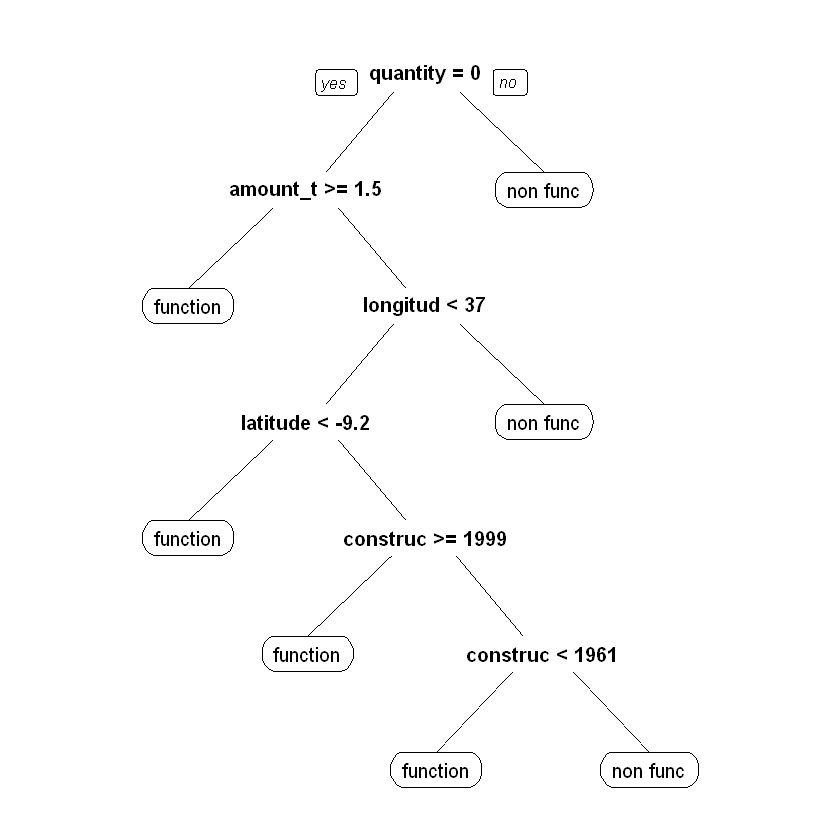

In [16]:
library(rpart)
library(rpart.plot)

data_train

# example model 

model<- rpart(status_group~., data= data_train, method = 'class') # creation of the model


prp(model) # print tree

predict_unseen <- predict(model,data_test, type = 'class') # prediction

status_group <-predict_unseen

data_predict <- test_set_values




data_predict <- cbind(data_predict[1],status_group)

table(data_predict["status_group"] == "functional")

data_predict

write.csv(data_predict,"decisionTree.csv",row.names = FALSE)

## Model 2 : Neural Network

Given how popular Neural Networks are, we will also use it for the data. However we do not expect enormous result with this model since Neural Network work better for other type of problems

In [17]:
library(nnet)

data_train

# example model 


nnet_model <- nnet(status_group~., data= data_train, size = 8, decay=5e-4, maxit=200) # what we need to change according of the model

predict_unseen <- predict(nnet_model, data_test, type= 'class')

status_group <-predict_unseen

nnet_data_predict <- cbind(data_predict[1],status_group)

nnet_data_predict

table(nnet_data_predict["status_group"] == "functional")

write.csv(nnet_data_predict,"NeuralNetwork.csv",row.names = FALSE)

Warning message:
"package 'nnet' was built under R version 3.6.3"

id,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,construction_year,water_quality_coloured,water_quality_fluoride,water_quality_fluoride_abandoned,water_quality_milky,water_quality_salty,water_quality_salty_abandoned,water_quality_soft,water_quality_unknown,quantity_dry,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown,status_group
69572,6000,1390,34.93809,-9.856322,11,5,109,1999,0,0,0,0,0,0,1,0,0,1,0,0,0,functional
8776,0,1399,34.69877,-2.147466,20,2,280,2010,0,0,0,0,0,0,1,0,0,0,1,0,0,functional
34310,25,686,37.46066,-3.821329,21,4,250,2009,0,0,0,0,0,0,1,0,0,1,0,0,0,functional
67743,0,263,38.48616,-11.155298,90,63,58,1986,0,0,0,0,0,0,1,0,1,0,0,0,0,non functional
19728,0,0,31.13085,-1.825359,18,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60739,10,1210,37.16981,-3.253847,3,5,125,1999,0,0,0,0,0,0,1,0,0,1,0,0,0,functional
27263,4700,1212,35.24999,-9.070629,11,4,56,1996,0,0,0,0,0,0,1,0,0,1,0,0,0,functional
37057,0,0,34.01709,-8.750434,12,7,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,functional
31282,0,0,35.86132,-6.378573,1,4,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,functional


# weights:  211
initial  value 72446.065469 
iter  10 value 52993.330202
iter  20 value 52830.616659
iter  30 value 52803.706918
iter  40 value 52792.139038
iter  50 value 52783.498628
iter  60 value 52777.197193
iter  70 value 52770.110920
iter  80 value 52764.683542
iter  90 value 52760.784709
iter 100 value 52758.663195
iter 110 value 52757.710804
iter 120 value 52756.124555
iter 130 value 52752.994148
iter 140 value 52752.398321
iter 150 value 52751.845815
iter 160 value 52751.249506
iter 170 value 52749.808160
iter 180 value 52747.109191
iter 190 value 52746.559709
iter 200 value 52746.379487
final  value 52746.379487 
stopped after 200 iterations


,id,status_group
59401,50785,functional
59402,51630,functional
59403,17168,functional
59404,45559,functional
59405,49871,functional
...,...,...
74246,39307,functional
74247,18990,functional
74248,28749,functional
74249,33492,functional



FALSE  TRUE 
   46 14804 

In [18]:
#predict_unseen <- predict(nnet_model,only_num_var_train, type= 'class') # test nathan with know variable

In [19]:
#results <- table(ifelse(predict_unseen == training_set_labels$status_group, "true", "false"))
#results["true"]/(results["true"]+results["false"])

## Model 3 : Random Forest

We chose this model because it is the continuity of decision tree and we think it is a good way to achieve a correct prediction

In [20]:
library("randomForest")

rf_model<- randomForest(status_group~., data= data_train, ntrees= 1000) # what we need to change according of the model


rf_predict_unseen <- predict(rf_model,data_test, type = 'class')

rf_predict_unseen

status_group <-rf_predict_unseen

rf_data_predict <- test_set_values


rf_data_predict <- cbind(data_predict[1],status_group)


rf_data_predict

write.csv(rf_data_predict,"randomForest.csv",row.names = FALSE)

Warning message:
"package 'randomForest' was built under R version 3.6.3"randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


59401                   59402                   59403 
             functional              functional              functional 
                  59404                   59405                   59406 
         non functional              functional              functional 
                  59407                   59408                   59409 
             functional          non functional          non functional 
                  59410                   59411                   59412 
             functional              functional          non functional 
                  59413                   59414                   59415 
         non functional              functional              functional 
                  59416                   59417                   59418 
             functional              functional              functional 
                  59419                   59420                   59421 
             functional          non functional              functional 
                  59422                   59423                   59424 
             functional          non functional          non functional 
                  59425                   59426                   59427 
             functional              functional          non functional 
                  59428                   59429                   59430 
         non functional              functional              functional 
                  59431                   59432                   59433 
             functional              functional              functional 
                  59434                   59435                   59436 
             functional              functional              functional 
                  59437                   59438                   59439 
             functional              functional          non functional 
                  59440                   59441                   59442 
         non functional          non functional              functional 
                  59443                   59444                   59445 
             functional          non functional              functional 
                  59446                   59447                   59448 
         non functional              functional              functional 
                  59449                   59450                   59451 
             functional              functional              functional 
                  59452                   59453                   59454 
             functional              functional          non functional 
                  59455                   59456                   59457 
         non functional          non functional              functional 
                  59458                   59459                   59460 
         non functional          non functional              functional 
                  59461                   59462                   59463 
             functional              functional              functional 
                  59464                   59465                   59466 
         non functional              functional              functional 
                  59467                   59468                   59469 
             functional          non functional              functional 
                  59470                   59471                   59472 
         non functional          non functional functional needs repair 
                  59473                   59474                   59475 
             functional          non functional          non functional 
                  59476                   59477                   59478 
             functional              functional              functional 
                  59479                   59480                   59481 
             functional          non functional              functional 
                  59482                   59483                   59484 
   

,id,status_group
59401,50785,functional
59402,51630,functional
59403,17168,functional
59404,45559,non functional
59405,49871,functional
...,...,...
74246,39307,non functional
74247,18990,functional
74248,28749,functional
74249,33492,functional


In [21]:
rf_model


Call:
 randomForest(formula = status_group ~ ., data = data_train, ntrees = 1000) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 24.82%
Confusion matrix:
                        functional functional needs repair non functional
functional                   29817                     189           2253
functional needs repair       3204                     485            628
non functional                8388                      80          14356
                        class.error
functional                0.0756998
functional needs repair   0.8876535
non functional            0.3710130

In [22]:
# Caret
# library(caret)

# caret_model<- train(status_group~., data= data_train) # what we need to change according of the model


# caret_predict_unseen <- predict(caret_model,data_test, type = 'class')

# caret_predict_unseen

# status_group <-caret_predict_unseen

# caret_data_predict <- test_set_values


# caret_data_predict <- cbind(data_predict[1],status_group)


# caret_data_predict

# Alternative models


TODO : trouver un modèle qui n'existe pas




# Conclusions

In conclusion, we found that decision tree / random forest works best between our 3 models, and we think it would be even better with more accurate data (for exemple pressure sensors, temperature sensors, etc ... ). 

Neural Network is also be a good candidate for this type of problem because it can create abstraction about data in a smarter way than Nearest Neighbor to understand that geographically close waterpumps might or might not suffer the same problem